In [97]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
#import file
filepath = "data.csv"
df = pd.read_csv(filepath)
display(df.head())
print(df.shape)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


(6819, 96)


In [99]:
#Check for missing values
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [100]:
#Checking if all columns are numeric
assert all(pd.api.types.is_numeric_dtype(df[column]) for column in df)

In [101]:
#Exploratory data analysis
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


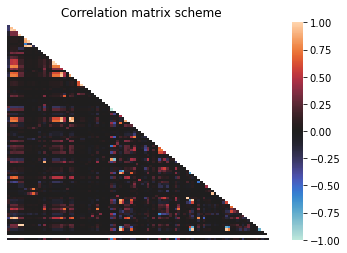

In [102]:
#Analyzing covariance
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), vmax = 1, vmin = -1, center = 0, mask = mask, fmt=".2f")
plt.title("Correlation matrix scheme")
plt.xticks([])
plt.yticks([])
plt.show()

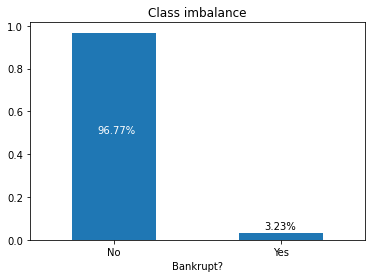

In [103]:
#Checking the class of interest balance
class_balance = df.value_counts("Bankrupt?", normalize= True)
class_balance.plot(kind= "bar")
plt.title("Class imbalance")
plt.xticks(rotation = 0, ticks = [0, 1], labels = ["No", "Yes"])
plt.annotate(str(round(class_balance[0] * 100, 2)) + "%", xy = (0, 1), xytext = (-0.1, 0.5), **{"color": "white"})
plt.annotate(str(round(class_balance[1] * 100, 2)) + "%", xy = (1, 0.05), xytext = (0.9, 0.05))
plt.show()

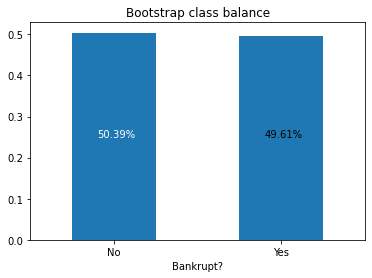

In [104]:
#Creating a class weight multiplier for 1/1 balance and adding it to the DataFrame
class_weights = len(df) / (len(df["Bankrupt?"].unique()) * np.bincount(df["Bankrupt?"]))
df["class_weights"] = np.where(df["Bankrupt?"] == 1, class_weights[1], class_weights[0])

#Creating a new bootstrapped dataframe, using the weights above
SEED = 9
balanced_df = df.sample(frac = 1, replace = True, weights = "class_weights", random_state = SEED)

#Checking results
bootstrap_class_balance = balanced_df.value_counts("Bankrupt?", normalize= True)
bootstrap_class_balance.plot(kind = "bar")
plt.title("Bootstrap class balance")
plt.xticks(rotation = 0, ticks = [0, 1], labels = ["No", "Yes"])
plt.annotate(str(round(bootstrap_class_balance[0] * 100, 2)) + "%", xy = (0, 0.25), xytext = (-0.1, 0.25), **{"color": "white"})
plt.annotate(str(round(bootstrap_class_balance[1] * 100, 2)) + "%", xy = (1, 0.05), xytext = (0.9, 0.25))
plt.show()

In [105]:
#Cross validating some hyperparameters for RandomForest model tunning
X_balanced = balanced_df.drop(["Bankrupt?", "class_weights"], axis = 1)
y_balanced = balanced_df["Bankrupt?"]

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced,
                                                                                        y_balanced, 
                                                                                        test_size= 0.2, 
                                                                                        stratify= y_balanced, 
                                                                                        random_state= SEED)
kf = KFold()
param_grid = {"n_estimators": [100, 200, 300, 400],
              "max_depth": [20, 30, 40, 50]}
rf = RandomForestClassifier(random_state= SEED)
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, cv = kf, n_jobs= -1)
rf_cv.fit(X_train_balanced, y_train_balanced)
print(rf_cv.best_params_, rf_cv.best_score_)

{'max_depth': 30, 'n_estimators': 200} 0.9893675527039413


In [106]:
#Tunned RF model according to cross validation
rf_tunned = RandomForestClassifier(max_depth= 30, 
                                   n_estimators= 200,
                                   random_state= SEED).fit(X_train_balanced, y_train_balanced)
y_pred_balanced = rf_tunned.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, y_pred_balanced))
print(classification_report(y_test_balanced, y_pred_balanced))

[[675  12]
 [  0 677]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       687
           1       0.98      1.00      0.99       677

    accuracy                           0.99      1364
   macro avg       0.99      0.99      0.99      1364
weighted avg       0.99      0.99      0.99      1364



In [107]:
#Applying the model to the original dataset
X_original = df.drop(["Bankrupt?", "class_weights"], axis = 1)
y_original = df["Bankrupt?"]
y_pred_original = rf_tunned.predict(X_original)
print(confusion_matrix(y_original, y_pred_original))
print(classification_report(y_original, y_pred_original))

[[6498  101]
 [   0  220]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6599
           1       0.69      1.00      0.81       220

    accuracy                           0.99      6819
   macro avg       0.84      0.99      0.90      6819
weighted avg       0.99      0.99      0.99      6819



In [111]:
#Deploying a base Random Forest model, trained on the original dataset, with severe imbalance for comparison
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_original,
                                                                        y_original, 
                                                                        test_size= 0.2, 
                                                                        stratify= y_original, 
                                                                        random_state= SEED)
rf_base = RandomForestClassifier(random_state = SEED).fit(X_train_base, y_train_base)
y_pred_base = rf_base.predict(X_test_base)
print(confusion_matrix(y_test_base, y_pred_base))
print(classification_report(y_test_base, y_pred_base))

[[1316    4]
 [  39    5]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.56      0.11      0.19        44

    accuracy                           0.97      1364
   macro avg       0.76      0.56      0.59      1364
weighted avg       0.96      0.97      0.96      1364



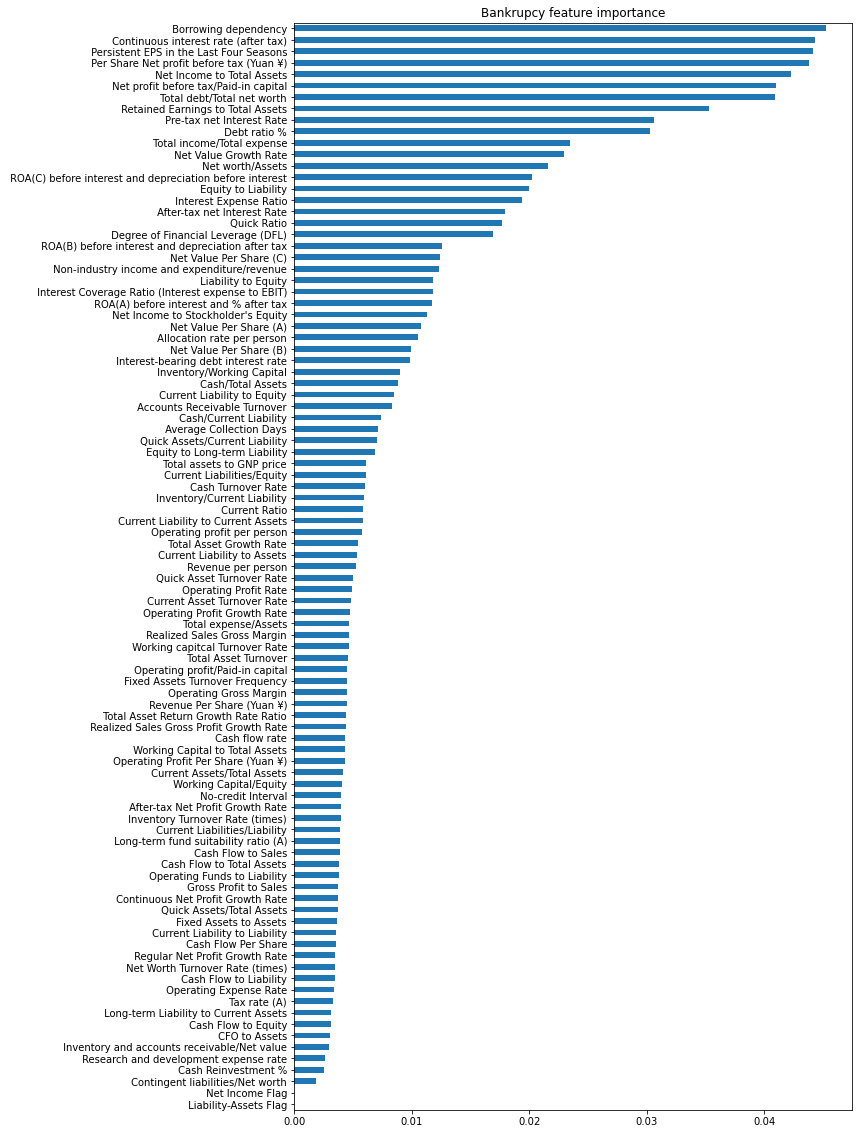

In [113]:
#Analysing most important features in the Random Forest tunned model
importances_rf = pd.Series(rf_tunned.feature_importances_, index = X_original.columns).sort_values()
importances_rf.plot(kind = "barh", figsize = (10, 20))
plt.title("Bankrupcy feature importance")
plt.show()